# Q3 Comparing Classifiers

Isaac Tabb

Text As Data

06/02/2023

Step 0: Read in Training & Validation sets

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

import io 
train_df = pd.read_csv(io.BytesIO(uploaded['training_set.csv']))
valid_df = pd.read_csv(io.BytesIO(uploaded['validation_set.csv']))

Saving training_set.csv to training_set.csv
Saving validation_set.csv to validation_set.csv


Now let's make sure those dataframes make sense. 

In [ ]:
# turn the dataframes into dictionaries
train_dct = train_df.to_dict('records')
valid_dct = valid_df.to_dict('records')

# create two separate lists, the tweets and the labels for both training and validation
train_tweets, train_labels = [], []
for tweet in train_dct:
  train_tweets.append(tweet['text'])
  train_labels.append(tweet['team'])

# do so for validation
valid_tweets, valid_labels = [], []
for tweet in valid_dct:
  valid_tweets.append(tweet['text'])
  valid_labels.append(tweet['team'])


## Dummy Classifier: Most Frequent

Let's create a dummy classifier which classifies all of the tweets as MiamiHeat.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier

# create vectorizer most frequent
vectorizer_mf = TfidfVectorizer()
# fit to train
X_mf = vectorizer_mf.fit(train_tweets)
# transform both
vectorized_train_mf = vectorizer_mf.transform(train_tweets)
vectorized_valid_mf = vectorizer_mf.transform(valid_tweets)

# create classifier with strategy most frequent
clf = DummyClassifier(strategy="most_frequent").fit(vectorized_train_mf, train_labels)
labels_predicted = clf.predict(vectorized_valid_mf)

And let's see the scores!

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(valid_labels, labels_predicted)
print(f"{accuracy=:.3f}")

precision = precision_score(valid_labels, labels_predicted, average='macro')
print(f"{precision=:.3f}")

recall = recall_score(valid_labels, labels_predicted, average='macro')
print(f"{recall=:.3f}")

f1 = f1_score(valid_labels, labels_predicted, average='macro')
print(f"{f1=:.3f}")

accuracy=0.723
precision=0.181
recall=0.250
f1=0.210


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Dummy Classifier: Stratified

Let's create the dummy classifier which uses the stratified method.

In [ ]:
# create vectorizer for stratified
vectorizer_strat = TfidfVectorizer()
# fit to train
X_strat = vectorizer_strat.fit(train_tweets)
# transform both
vectorized_train_strat = vectorizer_strat.transform(train_tweets)
vectorized_valid_strat = vectorizer_strat.transform(valid_tweets)

# new classifier with strategy stratified
clf = DummyClassifier(strategy="stratified").fit(vectorized_train_strat, train_labels)
labels_predicted = clf.predict(vectorized_valid_strat)

And the scores?

In [ ]:
accuracy = accuracy_score(valid_labels, labels_predicted)
print(f"{accuracy=:.3f}")

precision = precision_score(valid_labels, labels_predicted, average='macro')
print(f"{precision=:.3f}")

recall = recall_score(valid_labels, labels_predicted, average='macro')
print(f"{recall=:.3f}")

f1 = f1_score(valid_labels, labels_predicted, average='macro')
print(f"{f1=:.3f}")

accuracy=0.562
precision=0.261
recall=0.260
f1=0.260


## LogisticRegression: One-Hot

First, let's perform one-hot vectorization.

In [ ]:
# use the binary=True, use_idf=False, and norm=None to turn vectorization into one hot
vectorizer_lg_onehot = TfidfVectorizer(binary=True, use_idf=False, norm=None)
# fit to the training set
X_lg_onehot = vectorizer_lg_onehot.fit(train_tweets)
# transform on traning and validation
vectorized_train_lg_onehot = vectorizer_lg_onehot.transform(train_tweets)
vectorized_valid_lg_onehot = vectorizer_lg_onehot.transform(valid_tweets)

Let's create the classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

# define the logistic regression classifier
# Note: I had to increase the max_iter value for the LogisticRegression model to run.
clf = LogisticRegression(max_iter=140).fit(vectorized_train_lg_onehot, train_labels)
labels_predicted = clf.predict(vectorized_valid_lg_onehot)

And the scores.

In [ ]:
accuracy = accuracy_score(valid_labels, labels_predicted)
print(f"{accuracy=:.3f}")

precision = precision_score(valid_labels, labels_predicted, average='macro')
print(f"{precision=:.3f}")

recall = recall_score(valid_labels, labels_predicted, average='macro')
print(f"{recall=:.3f}")

f1 = f1_score(valid_labels, labels_predicted, average='macro')
print(f"{f1=:.3f}")

accuracy=0.756
precision=0.602
recall=0.457
f1=0.501


## Logistic Regression: TFIDF



Now, let's vectorize for logistic regression with TFIDF.

In [ ]:
# create base tfidf vectorizer
vectorizer_lg_tfidf = TfidfVectorizer()
# fit to train
X_lg_tfidf = vectorizer_lg_tfidf.fit(train_tweets)
# transform both
vectorized_train_lg_tfidf = vectorizer_lg_tfidf.transform(train_tweets)
vectorized_valid_lg_tfidf = vectorizer_lg_tfidf.transform(valid_tweets)

Let's create the classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

# define the logistic regression classifier
clf = LogisticRegression().fit(vectorized_train_lg_tfidf, train_labels)
labels_predicted = clf.predict(vectorized_valid_lg_tfidf)

And the scores!

In [ ]:
accuracy = accuracy_score(valid_labels, labels_predicted)
print(f"{accuracy=:.3f}")

precision = precision_score(valid_labels, labels_predicted, average='macro')
print(f"{precision=:.3f}")

recall = recall_score(valid_labels, labels_predicted, average='macro')
print(f"{recall=:.3f}")

f1 = f1_score(valid_labels, labels_predicted, average='macro')
print(f"{f1=:.3f}")

accuracy=0.760
precision=0.662
recall=0.419
f1=0.473


## SVC Classifier: One Hot


First, let's perform one-hot vectorization.

In [ ]:
# use the binary=True, use_idf=False, and norm=None to turn vectorization into one hot
vectorizer_svc_onehot = TfidfVectorizer(binary=True, use_idf=False, norm=None)
# fit to the training set
X_svc_onehot = vectorizer_svc_onehot.fit(train_tweets)
# transform on traning and validation
vectorized_train_svc_onehot = vectorizer_svc_onehot.transform(train_tweets)
vectorized_valid_svc_onehot = vectorizer_svc_onehot.transform(valid_tweets)

Now, let's use the SVC classifier.

In [ ]:
from sklearn.svm import SVC

# define the SVC classifier
clf = SVC().fit(vectorized_train_svc_onehot, train_labels)
labels_predicted = clf.predict(vectorized_valid_svc_onehot)

And the scores!

In [ ]:
accuracy = accuracy_score(valid_labels, labels_predicted)
print(f"{accuracy=:.3f}")

precision = precision_score(valid_labels, labels_predicted, average='macro')
print(f"{precision=:.3f}")

recall = recall_score(valid_labels, labels_predicted, average='macro')
print(f"{recall=:.3f}")

f1 = f1_score(valid_labels, labels_predicted, average='macro')
print(f"{f1=:.3f}")

accuracy=0.750
precision=0.623
recall=0.388
f1=0.433


## Best Performing Classifier by Class
#### (Logistic Regression using One Hot Vectorization)

Let's create the vectorizer again along with the classifier.

In [ ]:
# use the binary=True, use_idf=False, and norm=None to turn vectorization into one hot
vectorizer_lg_onehot = TfidfVectorizer(binary=True, use_idf=False, norm=None)
# fit to the training set
X_lg_onehot = vectorizer_lg_onehot.fit(train_tweets)
# transform on traning and validation
vectorized_train_lg_onehot = vectorizer_lg_onehot.transform(train_tweets)
vectorized_valid_lg_onehot = vectorizer_lg_onehot.transform(valid_tweets)

In [ ]:
from sklearn.linear_model import LogisticRegression

# create the classifier again
# Note: I had to increase the max_iter value for the LogisticRegression model to run.
clf = LogisticRegression().fit(vectorized_train_lg_onehot, train_labels)
labels_predicted = clf.predict(vectorized_valid_lg_onehot)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Let's print the F1-score by label.

MiamiHeat: f1=0.860
BostonCeltics: f1=0.324
DenverNuggets: f1=0.527
LosAngelesLakers: f1=0.295


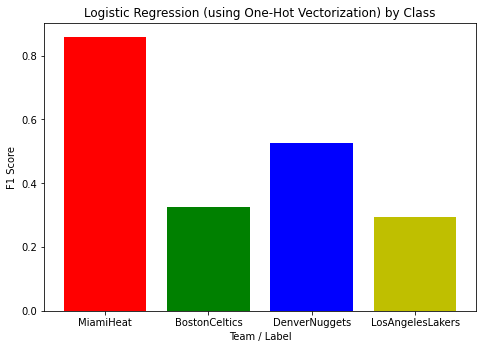

In [ ]:
import matplotlib.pyplot as plt
teams = ["MiamiHeat", "BostonCeltics", "DenverNuggets", "LosAngelesLakers"]
f1_scores = []

# iterate through the teams, calculating the f1_scores for each team
for team in teams:
  f1 = f1_score(valid_labels, labels_predicted, average='macro', labels=[team])
  f1_scores.append(f1)
  print(team + ": "f"{f1=:.3f}")

# create the bar plot with the f1_scores for each team
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(teams[0], f1_scores[0], color='r')
axis.bar(teams[1], f1_scores[1], color='g')
axis.bar(teams[2], f1_scores[2], color='b')
axis.bar(teams[3], f1_scores[3], color='y')
plt.ylabel("F1 Score")
plt.xlabel("Team / Label")
plt.title("Logistic Regression (using One-Hot Vectorization) by Class")
plt.show()

### Comparing Classifiers: Part B

Since one-hot vectorization appeared to outperform TFIDF vectorization, we will use O-H as our vectorization approach.

For our classifier, we will choose one that works well on high-dimensional datasets.

The option that I chose was a Decision Tree. With tuning to the min_samples_leaf parameter, the Decision Tree classifier should be able to handle the high-dimensionality. To avoid overfitting, we will run through possible values for the min_samples_leaf parameter. We will use the one that produces the best f1-score.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

min_samples = [1,2,3,4,5,6,7,8,9,10]

max = 0
# iterate through possibilities for min_samples parameter
for val in min_samples:
  # use the binary=True, use_idf=False, and norm=None to turn vectorization into one hot
  vectorizer_nb = TfidfVectorizer(binary=True, use_idf=False, norm=None)
  # fit to the training set
  X_nb = vectorizer_nb.fit(train_tweets)
  # transform on traning and validation
  vectorized_train_nb = vectorizer_nb.transform(train_tweets)
  vectorized_valid_nb = vectorizer_nb.transform(valid_tweets)

  # run classifer with min_samples value
  clf = DecisionTreeClassifier(min_samples_leaf=val).fit(vectorized_train_nb, train_labels)
  labels_predicted = clf.predict(vectorized_valid_nb)
  # calculate f1_score
  f1 = f1_score(valid_labels, labels_predicted, average='macro')

  # save max value for f1 corresponding min_samples
  if max < f1:
    max = f1
    max_val = val


And our best value is:

In [ ]:
print("Best min_samples_leaf: " + str(max_val) + ", f1=" + str(round(max,4)))

Best min_samples_leaf: 5, f1=0.5295


So, for our classifier we will use the min_samples_leaf value 5.

In [ ]:
# use the binary=True, use_idf=False, and norm=None to turn vectorization into one hot
vectorizer_nb = TfidfVectorizer(binary=True, use_idf=False, norm=None)
# fit to the training set
X_nb = vectorizer_nb.fit(train_tweets)
# transform on traning and validation
vectorized_train_nb = vectorizer_nb.transform(train_tweets)
vectorized_valid_nb = vectorizer_nb.transform(valid_tweets)

# run classifer with min_samples
clf = DecisionTreeClassifier(min_samples_leaf=5).fit(vectorized_train_nb, train_labels)
labels_predicted = clf.predict(vectorized_valid_nb)
f1 = f1_score(valid_labels, labels_predicted, average='macro')

And the scores.

In [ ]:
accuracy = accuracy_score(valid_labels, labels_predicted)
print(f"{accuracy=:.3f}")

precision = precision_score(valid_labels, labels_predicted, average='macro')
print(f"{precision=:.3f}")

recall = recall_score(valid_labels, labels_predicted, average='macro')
print(f"{recall=:.3f}")

f1 = f1_score(valid_labels, labels_predicted, average='macro')
print(f"{f1=:.3f}")

accuracy=0.755
precision=0.608
recall=0.512
f1=0.549


And the F1-scores split by class.

MiamiHeat: f1=0.854
BostonCeltics: f1=0.436
DenverNuggets: f1=0.538
LosAngelesLakers: f1=0.368


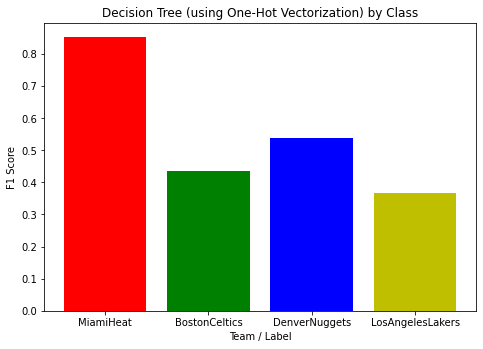

In [ ]:
f1_scores = []

# iterate through each team saving their f1 score
for team in teams:
  f1 = f1_score(valid_labels, labels_predicted, average='macro', labels=[team])
  f1_scores.append(f1)
  print(team + ": "f"{f1=:.3f}")

# plot the f1 scores by team
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(teams[0], f1_scores[0], color='r')
axis.bar(teams[1], f1_scores[1], color='g')
axis.bar(teams[2], f1_scores[2], color='b')
axis.bar(teams[3], f1_scores[3], color='y')
plt.ylabel("F1 Score")
plt.xlabel("Team / Label")
plt.title("Decision Tree (using One-Hot Vectorization) by Class")
plt.show()